# 지표 탐색 및 파이프라인 구축하기
---

### 목표
1. 지표 탐색(AARRR)
    - Acquisition(획득) : 회원가입 기준
    - Activation(활성화) : 회원가입 후 첫 투표
    - Retention(유지) : 다른 날 재접속하여 투표를 하는가
    - Revenue(수익) : 하트 구매
    - Referral(추천) : 1인당 초대한 친구 수

## 필요 라이브러리 정리
---
#### 1. 라이브러리 불러오기


In [1]:
## 1.필요 라이브러리 정리 
import pandas as pd

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

### 2. 데이터 불러오기 실행 확인

In [2]:
## 2. GCS에서 데이터 불러오기
df = pd.read_parquet(
    "gs://my-advanced_data-bucket/votes/accounts_timelinereport.parquet",
    storage_options={"token": "/home/user/codeit_project/codeit-project-docker/config/key.json"}
)

display(df.head())

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


## 데이터 가져오기
---
### 1. Votes 데이터 가져오기
### 2. Votes 데이터 내 전처리
### 3. Hackle 데이터 가져오기
### 4. Hackle 데이터 내 전처리

In [3]:
# 인증
key_path = "/home/user/codeit_project/codeit-project-docker/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced_data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
hackle_blobs = bucket.list_blobs(prefix="hackle/")
hackle_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Hackle files in GCS:")
print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced_data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced_data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced_data-bucket/votes/accounts_group.parquet', 'gs://my-advanced_data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced_data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_school.parquet', 'gs://my-advanced_data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced_data-bucket/vot

In [4]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    
# hackle 내 각 파일을 불러와서 딕셔너리에 저장
for title in hackle_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

## Acquisition 
---
1. Acquistion 에 사용될 수 있는 데이터가 어떤 것들이 있는지 확인 
2. Acquistion 에 사용될 수 있는 데이터 가져오기
3. Acquisition 에 사용될 수 있는 데이터의 컬럼 확인


In [5]:
display(df_dict["accounts_attendance"].head())

# 데이터 타입 확인
print(df_dict["accounts_attendance"].dtypes)
## attendance_date_list 컬럼 object 타입으로 되어있음 -> 리스트로 변환 필요

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453


id                       int64
attendance_date_list    object
user_id                  int64
dtype: object


> attendance_date_list 컬럼 object 타입으로 되어있음 -> 리스트로 변환 필요
+ 컬럼 추가 : attendance_date_count
+ 컬럼 추가 : first_attendance_date
+ 컬럼 추가 : last_attendance_date
+ 컬럼 추가 : attendace_days_diff

In [6]:
accounts_attendance = df_dict["accounts_attendance"]
# ast.literal_eval을 사용하여 문자열로 저장된 리스트를 실제 리스트로 변환
# 문자열을 실제 리스트로 변환

accounts_attendance["attendance_date_list"] = \
accounts_attendance["attendance_date_list"].apply(ast.literal_eval)

# 변환된 데이터 타입 확인
print(accounts_attendance["attendance_date_list"].dtypes)
# 변환된 데이터 확인
display(accounts_attendance["attendance_date_list"].head())

object


0    [2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...
1    [2023-05-27, 2023-05-29, 2023-05-30, 2023-06-0...
2    [2023-05-27, 2023-05-29, 2023-05-30, 2023-05-3...
3    [2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...
4    [2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...
Name: attendance_date_list, dtype: object

In [7]:
from datetime import datetime

# 각 리스트를 날짜 오름차순으로 정렬
accounts_attendance["attendance_date_list"] = accounts_attendance["attendance_date_list"].apply(
    lambda x: sorted(x, key=lambda date: datetime.strptime(date, "%Y-%m-%d")) if x else x
)

# 결과 확인
display(accounts_attendance["attendance_date_list"].head())

0    [2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...
1    [2023-05-27, 2023-05-29, 2023-05-30, 2023-06-0...
2    [2023-05-27, 2023-05-29, 2023-05-30, 2023-05-3...
3    [2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...
4    [2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...
Name: attendance_date_list, dtype: object

In [8]:
# 필요한 컬럼 추가 
accounts_attendance["first_attendance_date"] = accounts_attendance["attendance_date_list"].apply(
    lambda x: x[0] if x else None
)
accounts_attendance["last_attendance_date"] = accounts_attendance["attendance_date_list"].apply(
    lambda x: x[-1] if x else None
)
accounts_attendance["attendance_count"] = accounts_attendance["attendance_date_list"].apply(
    lambda x: len(x) if x else 0
)
accounts_attendance["attendance_days_diff"] = accounts_attendance.apply(
    lambda row: (datetime.strptime(row["last_attendance_date"], "%Y-%m-%d") - 
                 datetime.strptime(row["first_attendance_date"], "%Y-%m-%d")).days if row["first_attendance_date"] and row["last_attendance_date"] else None,
    axis=1
)
# 결과 확인
display(accounts_attendance.head())

,id,attendance_date_list,user_id,first_attendance_date,last_attendance_date,attendance_count,attendance_days_diff
0,1,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1446852,2023-05-27,2023-09-19,13,115.0
1,2,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-06-0...",1359398,2023-05-27,2023-08-22,33,87.0
2,3,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-05-3...",1501542,2023-05-27,2023-06-14,9,18.0
3,4,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1507767,2023-05-27,2023-06-30,30,34.0
4,5,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1287453,2023-05-27,2023-06-28,31,32.0


In [9]:
# 첫 출석일 마지막 출석일 -> datetime 형식으로 변환
accounts_attendance["first_attendance_date"] = pd.to_datetime(accounts_attendance["first_attendance_date"])
accounts_attendance["last_attendance_date"] = pd.to_datetime(accounts_attendance["last_attendance_date"])

# 첫 출석일과 마지막 출석일의 범위 확인

# -> 데이터 기간 확인을 위해서
print(f'''첫 출석일과 마지막 출석일의 범위 확인
첫 출석일 최소, 최대 :
{accounts_attendance["first_attendance_date"].min(), accounts_attendance["first_attendance_date"].max()}
마지막 출석일 최소, 최대 :
{accounts_attendance["last_attendance_date"].min(), accounts_attendance["last_attendance_date"].max()}
최종 데이터 기간 범위
{accounts_attendance["first_attendance_date"].min()} ~ {accounts_attendance["last_attendance_date"].max()}''')

첫 출석일과 마지막 출석일의 범위 확인
첫 출석일 최소, 최대 :
(Timestamp('2023-05-27 00:00:00'), Timestamp('2024-05-09 00:00:00'))
마지막 출석일 최소, 최대 :
(Timestamp('2023-05-27 00:00:00'), Timestamp('2024-05-09 00:00:00'))
최종 데이터 기간 범위
2023-05-27 00:00:00 ~ 2024-05-09 00:00:00


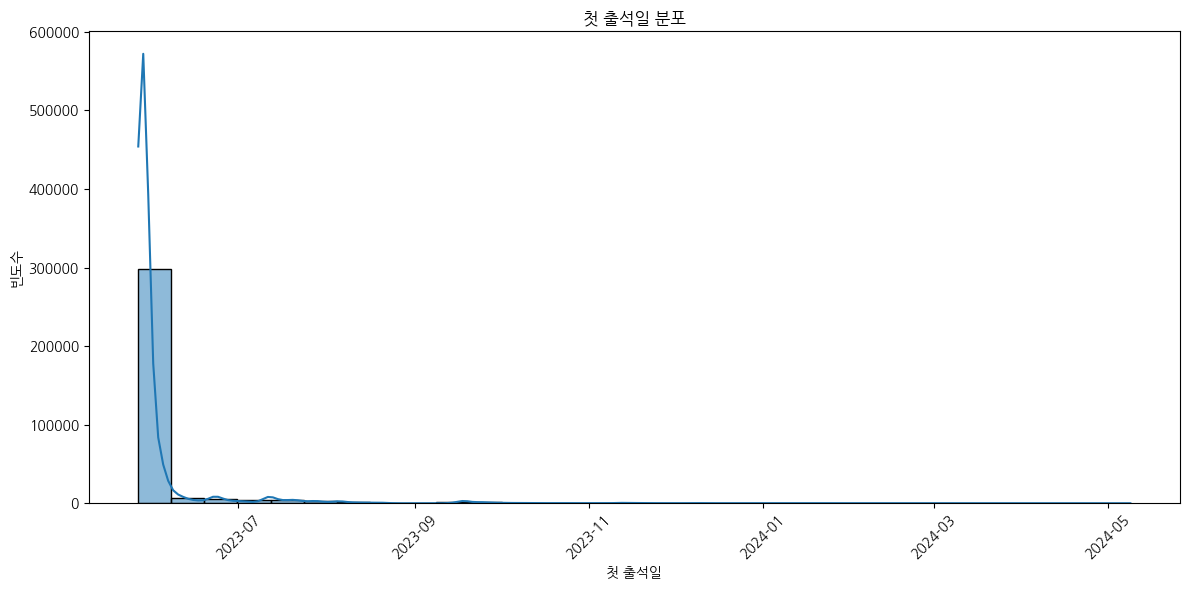

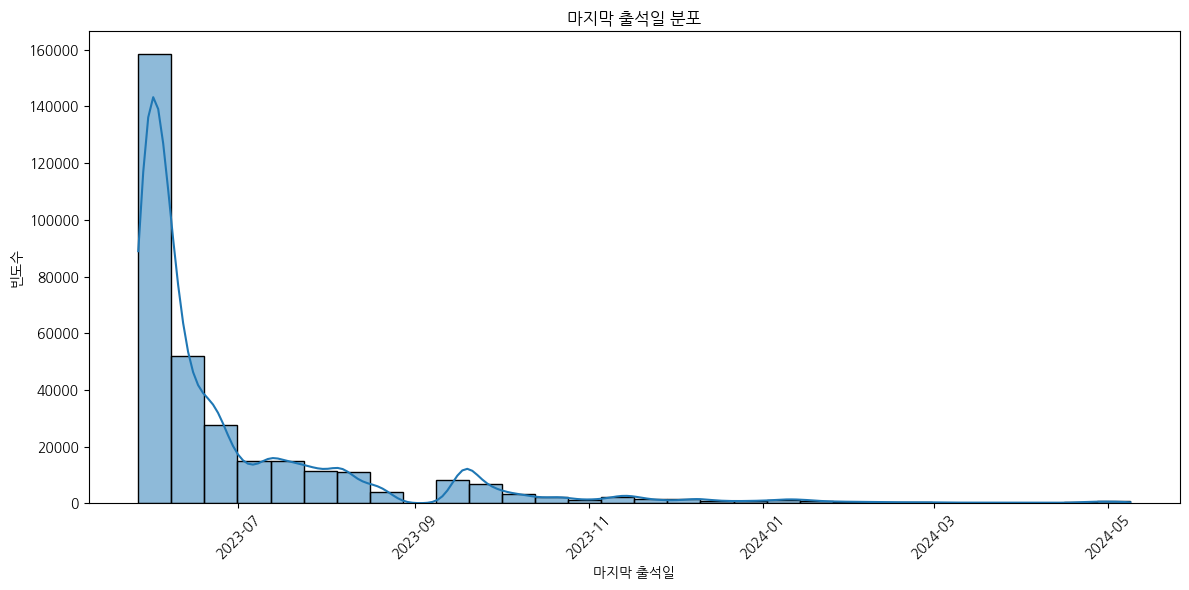

In [10]:
# 첫 출석일 분포 그래프
plt.figure(figsize=(12, 6))
sns.histplot(accounts_attendance["first_attendance_date"], bins=30, kde=True)
plt.title("첫 출석일 분포")
plt.xlabel("첫 출석일")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 마지막 출석일 분포 그래프
plt.figure(figsize=(12, 6))
sns.histplot(accounts_attendance["last_attendance_date"], bins=30, kde=True)
plt.title("마지막 출석일 분포")
plt.xlabel("마지막 출석일")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(f"acocunts_attendance 유저 아이디 수 : {accounts_attendance.user_id.nunique()}")
print(f"accounts_user 유저 아이디 수 : {df_dict['accounts_user'].id.nunique()}")

acocunts_attendance 유저 아이디 수 : 349637
accounts_user 유저 아이디 수 : 677085


vote 내에서 이벤트(signup) 처럼 알 수 없어서 획득 알기 어려움
- vote 에서는 첫 출석 -> 회원가입한 날로 생각하게 된다면 어떻게 되는지 그래프 그려볼 수 있음음
- hackle event 데이터가 기간이 짧을거라 그렇다면 특정 시점에서 획득이 이 정도였다 등으로 진행 예정

In [12]:
display(df_dict["hackle_events"].head())

df_dict["hackle_events"].dtypes

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN


event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
id                        object
item_name                 object
page_name                 object
friend_count             float64
votes_count              float64
heart_balance            float64
question_id              float64
dtype: object

In [13]:
hackle_events = df_dict["hackle_events"]
# 데이터 기간 확인
print(f'''hackle_events 데이터 기간 범위
{hackle_events["event_datetime"].min()} ~ {hackle_events["event_datetime"].max()}''')

# 

hackle_events 데이터 기간 범위
2023-07-18 00:00:00 ~ 2023-08-10 23:59:59


In [14]:
# df_dict["hackle_events"].session_id 와 df_dict["hackle_properties"].session_id

hackel_events_id_list = list(df_dict["hackle_events"].session_id.unique())
hackle_properties_id_list = list(df_dict["hackle_properties"].session_id.unique())

# hackle_events와 hackle_properties의 session_id가 일치하는지 확인
if set(hackel_events_id_list) == set(hackle_properties_id_list):
    print("hackle_events와 hackle_properties의 session_id가 일치합니다.")
else:
    print("hackle_events와 hackle_properties의 session_id가 일치하지 않습니다.")
    print(f"hackle_events id 개수: {len(hackel_events_id_list)}")
    print(f"hackle_properties id 개수: {len(hackle_properties_id_list)}")

hackle_events와 hackle_properties의 session_id가 일치합니다.


In [15]:
# hackle_properties의 user_id와 user_properties의 user_id가 일치하는지 확인
hackle_properties_user_id_list = list(df_dict["hackle_properties"].user_id.unique())
user_properties_user_id_list = list(df_dict["user_properties"].user_id.unique())
if set(hackle_properties_user_id_list) == set(user_properties_user_id_list):
    print("hackle_properties와 hackle_user_properties의 user_id가 일치합니다.")
else:
    print("hackle_properties와 hackle_user_properties의 user_id가 일치하지 않습니다.")
    print(f"hackle_properties user_id 개수: {len(hackle_properties_user_id_list)}")
    print(f"hackle_user_properties user_id 개수: {len(user_properties_user_id_list)}")

hackle_properties와 hackle_user_properties의 user_id가 일치하지 않습니다.
hackle_properties user_id 개수: 327381
hackle_user_properties user_id 개수: 230819


In [16]:
# 그렇다면 hackle_properties 안에 user_properties user_id 포함되는지
if set(hackle_properties_user_id_list).issubset(set(user_properties_user_id_list)):
    print("hackle_properties의 user_id는 hackle_user_properties의 user_id에 포함됩니다.")
else:
    print("hackle_properties의 user_id는 hackle_user_properties의 user_id에 포함되지 않습니다.")
    print(f"hackle_properties user_id 개수: {len(hackle_properties_user_id_list)}")
    print(f"hackle_user_properties user_id 개수: {len(user_properties_user_id_list)}")
    # 포함되지 않는 user_id 확인
    not_included_user_ids = set(hackle_properties_user_id_list) - set(user_properties_user_id_list)
    print(f"포함되지 않는 user_id 수 : {len(not_included_user_ids)}")

hackle_properties의 user_id는 hackle_user_properties의 user_id에 포함되지 않습니다.
hackle_properties user_id 개수: 327381
hackle_user_properties user_id 개수: 230819
포함되지 않는 user_id 수 : 96563


In [28]:
# 포함되지 않은 user_id를 가진 hackle_properties 데이터 확인
not_in_included_hackle_properties = df_dict["hackle_properties"][df_dict["hackle_properties"].user_id.isin(not_included_user_ids)].reset_index(drop=True)
not_in_included_hackle_properties.user_id.value_counts()

user_id
                                82255
LWO24jB8PvW1q8aarfAWmJfkpTh2        4
PMjEGw21m2X9wivdS3BdvUVLYQv2        4
VHpJstM8HcZjkLPOCQOmCwQLGtk2        4
HBGuodfgQmfcaTB6P4EwpiqSGQ92        4
                                ...  
Zs5Liwe0XIQR5UQpX0Gx2Y2Bm253        1
kxYPmriqrUbafKymrcJzpQV6hcA2        1
xEUQWQQRi0bRit0NeAnu9DGBAQY2        1
MtmeGIaSusPQ2UGuyVXpldkaGa23        1
cpZ6XwYLTkbwDHpBkjp9bPLjVE53        1
Name: count, Length: 96563, dtype: int64

In [36]:
not_in_included_hackle_properties.head()

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,6,LztzUUFoRxdqTSPgQrX3MAAyNkM2,LztzUUFoRxdqTSPgQrX3MAAyNkM2,ko-KR,iOS,16.1,2.0.5,3F199073-9390-4137-B0B0-0DC4FC103009
2,28,qLdDlFGK9qObRuGXK20KAGbqzRZ2,qLdDlFGK9qObRuGXK20KAGbqzRZ2,ko,Android,13,2.0.3,7ffeeed2-6f34-45d9-82b1-9119c453135b
3,42,i6toBlZRPDNAnwhvkIWwD16Fcts1,,ko-KR,iOS,16.4.1,2.0.5,0C3D3EDA-8F76-43BD-B9AD-7B5DCC3FB8B1
4,47,98078b29-9edc-4097-bb7a-500141473bb3,xQeEzeBtbBSX7gsxJCWFJ3XvXU02,ko,Android,12,2.0.0,98078b29-9edc-4097-bb7a-500141473bb3


In [35]:
# 숫자로만 이루어진 user_id만 필터링
numeric_user_ids = not_in_included_hackle_properties[
    not_in_included_hackle_properties['user_id'].str.match(r'^\d+$')
]

# 결과 확인
print(numeric_user_ids)
print(f"숫자로만 이루어진 user_id 개수: {len(numeric_user_ids)}")

            id                            session_id  user_id language  \
543       9335          76bL6L1SkaeUkAktfCcOAR6XaUQ2  1026897    ko-KR   
15955   146158          L3PPcjyNDmZml9fKJWDOt6WbZ8T2  1134838    ko-KR   
27749   201639  F699F45E-128C-4E01-9E4E-C3C2C283B92D  1249772    ko-KR   
52605   278525          LzPEsgYTC7YvKBzixd71xJLClaI2  1155693    ko-KR   
57392   290213          7X6OlYSAiwQWfRbeI6XAhHZ6YAj2  1427753    ko-KR   
61888   300487          nVowyfRKo3fXECKdOWHMSdBkCaa2  1023670    ko-KR   
79332   336802          cHeWXPQi4nW0WS7expWvmSoOrkm1  1309996    ko-KR   
92249   360430          XjGXjuMvvAW5eeKOAUKtmMrwtbq2  1244082    ko-KR   
118888  404800          vy1AtY5fJihtB4h8Yxq4MCHsc7c2  1339752    ko-KR   
119914  406392  9779C254-CD6B-4F92-8D1E-15B0495669E1  1074165    ko-KR   
122097  409800          GWEpxqHtqacuXpPiXe1AGIjxEAo2  1435390    ko-KR   
125381  414962          irDNiy7wKoeTSWitC2aTGKe3VQj1  1145822    ko-KR   
126098  416044          Ec4lNS7rOFZMg1

In [46]:
df_dict["hackle_events"].head()

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN


In [39]:
df_dict["accounts_user"].head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [38]:
df_dict["hackle_properties"].head()

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


In [44]:
print(f"hackle_properties에서 user_id 데이터 타입 : {df_dict["hackle_properties"].user_id.dtype}")
print(f"accounts_user에서 user_id 데이터 타입 : {df_dict["accounts_user"].id.dtype}")

# 만약 데이터 타입 변환하지 않고 비교를 하게 된다면?
hackle_id_lst = df_dict["hackle_properties"].user_id.unique().tolist()
accounts_user_id_lst = df_dict["accounts_user"].id.unique().tolist()

# 두 리스트 교집합 구하기
intersection = set(hackle_id_lst) & set(accounts_user_id_lst)
# 교집합의 길이
intersection_length = len(intersection)
print(f"hackle_properties와 accounts_user의 교집합 길이: {intersection_length}")

# 만일 데이터 타입 변환하게 된다면?
# accounts_user의 id를 문자열로 변환
df_dict["accounts_user"]["id"] = df_dict["accounts_user"]["id"].astype(str)
accounts_user_id_lst = df_dict["accounts_user"].id.unique().tolist()
# 두 리스트 교집합 구하기
intersection = set(hackle_id_lst) & set(accounts_user_id_lst)
# 교집합의 길이
intersection_length = len(intersection)
print(f"hackle_properties와 accounts_user의 교집합 길이 (데이터 타입 변환 후): {intersection_length}")

hackle_properties에서 user_id 데이터 타입 : object
accounts_user에서 user_id 데이터 타입 : int64
hackle_properties와 accounts_user의 교집합 길이: 0
hackle_properties와 accounts_user의 교집합 길이 (데이터 타입 변환 후): 226365


**합리적인 의심**       
- hackle_events와 hackle_properties를 합치기 위해서는 session_id로 병합 필요
    - why? 두 session 고유값이 같음
- hackle_properties와 user_properties를 합치기 위해서는 user_id로 병합 필요
    - user_id로 병합하는 이유는 무엇? hackle_properties는 어떤 이벤트 관련해서 알려주는 데이터(즉, 어플을 실행하고 회원가입을 하고 로그인을 하고 투표를 하고 등등)
    - 반면 user_properties는 회원가입을 완료한 회원들을 기준
    - 즉 유저가 적을 수 밖에 없음!!
        - 확인하려고 한다면? user_properties에 있는 user_id는 회원가입했던 기록이 있다던가?(데이터 기간이 짤려있어서 비율이 높아도 됨)

In [16]:
df_dict["user_properties"].head()

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078


## user_id 확인을 위해서
- 목적 : user를 구분하기 위해서 어떤 값이 적절한지 확인하고 연관성을 찾아 유저 특성 분석 및 해석에 용이하기 위해서

**진행 상황**       
1. accounts_user 테이블에서 id,즉 user_id와 user_properties 테이블에서 user_id가 서로 겹치는 값이 있는지 확인       
    (+ 상당한 케이스가 겹치는 것을 확인할 수 있음) -> 그에 따른
2. vote/accounts_user에서 id, created_at, group_id 필터림       
    (+ accounts_user에서 id가 user_id이기 때문에)
3. hackle/hackle_events에서는 session_id, event_id, event_datetime, event_key를 필터링      
    (+ event_key에서 complete_signup, hackle_properties와 합치기 위해 session_id 필요)      
4. hackle/hackle_properties에서는 session_id, user_id 필터링
    (+ hackle_events와 병합을 위해서 session_id 필요, 세션에 따른 user_id를 확인 가능)
4. hackle_properties와 hackle_events 병합 후  

In [17]:
# user_id 확인 좀

accounts_user_id_list = list(df_dict["accounts_user"]["id"].apply(str))
# accounts_user_id_list = accounts_user_id_list.apply(str)

user_properties_id_list = list(df_dict["user_properties"]["user_id"])

# accounts_user와 user_properties의 id가 일치하는지 확인
if set(accounts_user_id_list) == set(user_properties_id_list):
    print("accounts_user와 user_properties의 id가 일치합니다.")
else:
    print("accounts_user와 user_properties의 id가 일치하지 않습니다.")
    print(f"accounts_user id 개수: {len(accounts_user_id_list)}")
    print(f"user_properties id 개수: {len(user_properties_id_list)}")
    
# 그렇다면 user_properties의 user_id는 accounts_user 안에 포함되는가?
if all(user_id in accounts_user_id_list for user_id in user_properties_id_list):
    print("user_properties의 user_id는 accounts_user 안에 포함됩니다.")
else:
    print("user_properties의 user_id는 accounts_user 안에 포함되지 않습니다.")
    missing_ids = [user_id for user_id in user_properties_id_list if user_id not in accounts_user_id_list]
    print(f"포함되지 않는 user_id: {missing_ids[:10]}... (총 {len(missing_ids)}개)")

accounts_user와 user_properties의 id가 일치하지 않습니다.
accounts_user id 개수: 677085
user_properties id 개수: 230819
user_properties의 user_id는 accounts_user 안에 포함되지 않습니다.
포함되지 않는 user_id: ['1000041', '1000132', '1000164', '1000260', '1000855', '1000955', '1001292', '1001694', '1001737', '1002714']... (총 4490개)


In [29]:
round(4490/230819 * 100,2)

1.95

In [18]:
# 공통으로 잇는 user_id
common_user_ids = set(accounts_user_id_list) & set(user_properties_id_list)
print(f"공통으로 있는 user_id 개수: {len(common_user_ids)}")

# accounts_user 데이터에서 common_user_ids에 해당하는 데이터만 필터링
accounts_user_filtered = df_dict["accounts_user"][df_dict["accounts_user"]["id"].astype(str).isin(common_user_ids)]
accounts_user_filtered = accounts_user_filtered.reset_index(drop=True)

# accounts_user_filtered 데이터에서 사용할 컬럼만 필터링
accounts_user_filtered = accounts_user_filtered[["id", "created_at","group_id"]]

# 필터링 된 데이터 확인
display(accounts_user_filtered.head()) 

공통으로 있는 user_id 개수: 226329


,id,created_at,group_id
0,831962,2023-03-29 05:18:56.162368,12.0
1,832340,2023-03-29 12:56:35.020790,1.0
2,833041,2023-03-31 14:32:36.425315,149.0
3,833202,2023-03-31 15:58:12.136011,41.0
4,833203,2023-03-31 15:58:14.619962,42.0


In [19]:
# user_id를 위해서 hackle_events와 hackle_properties를 병합
# 필터링할 컬럼들
event_col = ["session_id","event_datetime","event_key", "id"]
property_col = ["session_id","user_id"]

hackle_events_properties = pd.merge(
    df_dict["hackle_events"][event_col],
    df_dict["hackle_properties"][property_col],
    on="session_id",
    how ="left"
)

# hackle_events_properties 데이터에서 common_user_id에 해당되는 데이터만 필터링
hackle_events_filtered = hackle_events_properties[hackle_events_properties["user_id"].astype(str).isin(common_user_ids)]

# hackle_events_filtered event_key이 complete_signup인 데이터만 필터링
hackle_events_filtered = hackle_events_filtered[hackle_events_filtered["event_key"] == "complete_signup"]

display(hackle_events_filtered.head())

,session_id,event_datetime,event_key,id,user_id
48902,EBB7AAFB-6071-458C-A8EA-3B27E8960C71,2023-07-20 19:06:26,complete_signup,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,1579148
48903,EBB7AAFB-6071-458C-A8EA-3B27E8960C71,2023-07-20 19:06:26,complete_signup,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,1579148
83941,4e9bdccd-18d1-43d4-bcc8-ffcc84ccadba,2023-07-29 19:47:57,complete_signup,00cabaf0-bd1c-41c8-bcef-02fcceecfefb,1579577
132511,53608491-9A79-4E27-8AC6-B111D0B42A0A,2023-07-26 02:23:04,complete_signup,013fb9a3-0b8d-41f5-a690-d58cd398b9a4,1579452
150479,679f672f-d5ce-4c6a-bad0-7a8e7070e625,2023-07-19 13:34:11,complete_signup,016b7031-bcbc-48d3-ad89-c4a5d803b0a8,1579086


In [20]:
# 그 전에 행수 확인 좀
print("accounts_user_filtered와 hackle_events_filtered의 행수 확인")
print(f"accounts_user_filtered 행수: {accounts_user_filtered.shape[0]}")
print(f"hackle_events_filtered 행수: {hackle_events_filtered.shape[0]}")

hackle_events_filtered = hackle_events_filtered.reset_index(drop=True)

# 데이터 타입 확인
print("hackle_events_filtered 데이터 타입 확인")
print(hackle_events_filtered.dtypes)
print("accounts_user_filtered 데이터 타입 확인")
print(accounts_user_filtered.dtypes)

accounts_user_filtered와 hackle_events_filtered의 행수 확인
accounts_user_filtered 행수: 226329
hackle_events_filtered 행수: 1106
hackle_events_filtered 데이터 타입 확인
session_id                object
event_datetime    datetime64[ms]
event_key                 object
id                        object
user_id                   object
dtype: object
accounts_user_filtered 데이터 타입 확인
id                     int64
created_at    datetime64[ns]
group_id             float64
dtype: object


In [22]:
# hackle_events_filtered 데이터
hackle_events_filtered = hackle_events_filtered.reset_index(drop=True)

# 이미 사용한 컬럼 제거
hackle_events_removed = hackle_events_filtered.drop(columns=["event_key", "session_id"])

# accounts_user_filtered 데이터 타입 변경
accounts_user_filtered["id"] = accounts_user_filtered["id"].astype(str)

# hackle_events_filtered 데이터와 accounts_user_filtered 데이터 병합
hackle_events_accounts = pd.merge(
    hackle_events_removed,
    accounts_user_filtered,
    left_on="user_id",
    right_on="id",
    how="left"
)

# 데이터 병합 결과
print(f"병합된 데이터 행수: {hackle_events_accounts.shape[0]}")
display(hackle_events_accounts.head())

병합된 데이터 행수: 1106


,event_datetime,id_x,user_id,id_y,created_at,group_id
0,2023-07-20 19:06:26,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,1579148,1579148,2023-07-20 10:06:26.124315,34628.0
1,2023-07-20 19:06:26,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,1579148,1579148,2023-07-20 10:06:26.124315,34628.0
2,2023-07-29 19:47:57,00cabaf0-bd1c-41c8-bcef-02fcceecfefb,1579577,1579577,2023-07-29 10:47:55.971900,57247.0
3,2023-07-26 02:23:04,013fb9a3-0b8d-41f5-a690-d58cd398b9a4,1579452,1579452,2023-07-25 17:23:01.715172,58941.0
4,2023-07-19 13:34:11,016b7031-bcbc-48d3-ad89-c4a5d803b0a8,1579086,1579086,2023-07-19 04:34:12.136687,84001.0


In [ ]:
# hackle_events와 hackle_properties의 session_id를 통한 병합
hackle_merged = pd.merge(
    df_dict["hackle_events"],
    df_dict["hackle_properties"],
    on="session_id",
    how="inner"
)
# 병합된 데이터 확인
display(hackle_merged.head())
# 병합된 데이터의 크기 확인
print(f"병합된 데이터의 크기: {hackle_merged.shape}")

# 병합되기 전 데이터 크기 확인
print(f"hackle_events 데이터의 크기: {df_dict['hackle_events'].shape}")
print(f"hackle_properties 데이터의 크기: {df_dict['hackle_properties'].shape}")

: 

In [ ]:
df_dict["user_properties"].head()

print(df_dict["user_properties"].user_id.duplicated().sum())

# user_properties의 user_id가 존재하고 중복값이 존재하지 않음

display(df_dict["hackle_properties"].head())

## 각 id의 중복값은

print(df_dict["hackle_properties"].user_id.duplicated().sum())
print(df_dict["hackle_properties"].device_id.duplicated().sum())
print(df_dict["hackle_properties"].session_id.duplicated().sum())

## 한 명의 유저를 특정하기 위헤서 user_id를 사용해야할까? 아니면 어떤 값을 사용해야할까?
print("\n각 id의 고유값 개수 확인")
print(df_dict["hackle_properties"].user_id.nunique())
print(df_dict["hackle_properties"].device_id.nunique())
print(df_dict["hackle_properties"].session_id.nunique())

0


,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


197969
273630
271734

각 id의 고유값 개수 확인
327381
251720
253616


In [ ]:
# 한 사람을 특정하기 위해서 user_id에 따른 세션의 수
display(df_dict["hackle_properties"].groupby("user_id")["session_id"].nunique().sort_values(ascending=False).head(10))

# 
df_dict["hackle_properties"].groupby("user_id")["device_id"].nunique().sort_values(ascending=False).head(10)

user_id
           78197
1459833       13
1571506       13
1578652       13
1239584       12
1285353       12
855879        12
910934        11
1388873       11
1454994       10
Name: session_id, dtype: int64

user_id
           77445
1571506       13
1459833       13
1578652       13
855879        12
1285353       12
1388873       11
910934        11
1239584       11
1454994       10
Name: device_id, dtype: int64

In [ ]:
# 예시 확인인
df_dict["hackle_properties"][df_dict["hackle_properties"].user_id == "1459833"].head()

,id,session_id,user_id,language,osname,osversion,versionname,device_id
2255,2256,E7291C7D-54D9-459B-B93D-EB3DB0B5EB54,1459833,ko-KR,iOS,16.3.1,2.0.5,E7291C7D-54D9-459B-B93D-EB3DB0B5EB54
24115,24116,EF35B630-C9C9-4CEF-B70A-C5EB2703C17F,1459833,ko-KR,iOS,16.3.1,2.0.5,EF35B630-C9C9-4CEF-B70A-C5EB2703C17F
30217,30218,3CF3AF75-ECF6-4A07-A4F3-66EE0D114428,1459833,ko-KR,iOS,16.3.1,2.0.5,3CF3AF75-ECF6-4A07-A4F3-66EE0D114428
61146,61147,91AC528E-4CE9-4E3E-9283-98DD3F0E40C1,1459833,ko-KR,iOS,16.3.1,2.0.5,91AC528E-4CE9-4E3E-9283-98DD3F0E40C1
64455,64456,4BC78F41-A9F2-400E-AEC6-1C9449163BC2,1459833,ko-KR,iOS,16.3.1,2.0.3,4BC78F41-A9F2-400E-AEC6-1C9449163BC2


In [ ]:
# 유저 아이디에 따른 세션 수와 device 수를 데이터 프레임으로 제작 후 확인
user_session_device_df = df_dict["hackle_properties"].groupby("user_id").agg({
    "session_id": "nunique",
    "device_id": "nunique"
}).reset_index()
user_session_device_df.columns = ["user_id", "session_count", "device_count"]
user_session_device_df.sort_values(by="session_count", ascending=False, inplace=True)
display(user_session_device_df.head())

# session_count에 따른 수 확인
user_session_device_df["session_count"].value_counts().sort_index()


,user_id,session_count,device_count
0,,78197,77445
158765,1459833,13,13
192534,1571506,13,13
195273,1578652,13,13
88523,1239584,12,11


session_count
1        325065
2          2062
3           146
4            44
5            19
6            15
7             8
8             7
9             5
10            1
11            2
12            3
13            3
78197         1
Name: count, dtype: int64

In [ ]:
display(df_dict["hackle_properties"].head())
df_dict["hackle_properties"].iloc[0].user_id

# user_id가 공백으로 되어있는 경우 제거
hackle_properties_not_null_user_id = df_dict["hackle_properties"][df_dict["hackle_properties"].user_id != ""]
hackle_properties_not_null_user_id

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


,id,session_id,user_id,language,osname,osversion,versionname,device_id
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3
5,6,LztzUUFoRxdqTSPgQrX3MAAyNkM2,LztzUUFoRxdqTSPgQrX3MAAyNkM2,ko-KR,iOS,16.1,2.0.5,3F199073-9390-4137-B0B0-0DC4FC103009
...,...,...,...,...,...,...,...,...
525344,525345,b82eptestoYIkel7zGItYz9XqF43,902597,ko-KR,iOS,16.0,2.0.3,B59DCE74-59FB-4417-9DDB-F9B620D71DFC
525345,525346,KlGJxOfY4XdbxnwzPckMh4NdwBk2,1373831,ko-KR,iOS,16.5.1,2.0.5,2EB9127D-703A-495B-8A1E-6667ACA9E724
525346,525347,HGxbSi2oq4MdFVGdQx2UH3f9Aq73,1043127,en-KR,iOS,16.1.2,2.0.3,4400D84D-0353-49C9-818E-6A45D54F1039
525348,525349,gQ5GvGk7kGWwnQbOzQ8fxseQp8B2,7m8IwV5H3aaxr1bdPbbkvvJMvtf2,ko,Android,12,1.2.15,eca30324-3b48-41a6-9628-ff663896dd23


In [ ]:
# 유저 id 없는 경우 빼고서 session_count 차이

user_session_device_df_no_null = hackle_properties_not_null_user_id.groupby("user_id").agg({
    "session_id": "nunique",
    "device_id": "nunique"
}).reset_index()
user_session_device_df_no_null.columns = ["user_id", "session_count", "device_count"]
user_session_device_df_no_null.sort_values(by="session_count", ascending=False, inplace=True)
display(user_session_device_df_no_null.head())

# session_count에 따른 수 확인
user_session_device_df_no_null["session_count"].value_counts().sort_index()

,user_id,session_count,device_count
158764,1459833,13,13
195272,1578652,13,13
192533,1571506,13,13
103927,1285353,12,12
88522,1239584,12,11


session_count
1     325065
2       2062
3        146
4         44
5         19
6         15
7          8
8          7
9          5
10         1
11         2
12         3
13         3
Name: count, dtype: int64